# Analysis of individual dihedrals

In this notebook we load data for individual dihedrals and plot the distribution.

For plotting _all_ dihedrals in a FEP run, look at [sampl_dihedrals.ipynb](sampl_dihedrals.ipynb).

In [70]:
import pathlib
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm

In [2]:
import dihedral_analysis

In [31]:
from importlib import reload

In [32]:
reload(dihedral_analysis)

<module 'dihedral_analysis' from '/Volumes/ASU/oliver/Projects/Methods/SAMPL7/gas_phase_sampling/conformational_analysis/analysis/dihedral_analysis.py'>

## Data 

In [9]:
DATADIRS = [pathlib.Path("../_dih_analysis/"), 
            pathlib.Path("../_dih_oplsaa_extended"),
            pathlib.Path("../_dih_gaff/"),
            pathlib.Path("../_dih_ligpargen/"),
           ]
OPLSAADIRS = DATADIRS[:2]
FIGURES = pathlib.Path("../figs/dihedrals/extended")

FIGURES.mkdir(parents=True, exist_ok=True)

## SM46 extended
The simulation SM46 FEP water VDW 1000 was extended to 1 microsecond and the SM46 in octanol to 466 ns. How do the dihedral distributions compare to the original simulations?

In [11]:
datafiles = dihedral_analysis.get_datafiles("*-ts.xvg*", datadirs=OPLSAADIRS)

In [12]:
datafiles

,molid,forcefield,solvent,interaction,lambda,dihedral,filename
0,SM46,cgenff,octanol,Coulomb,0.000,dih1,../_dih_analysis/cgenff-SM46-octanol-Coulomb-0...
1,SM46,cgenff,octanol,Coulomb,0.125,dih1,../_dih_analysis/cgenff-SM46-octanol-Coulomb-0...
2,SM46,cgenff,octanol,Coulomb,0.250,dih1,../_dih_analysis/cgenff-SM46-octanol-Coulomb-0...
3,SM46,cgenff,octanol,Coulomb,0.375,dih1,../_dih_analysis/cgenff-SM46-octanol-Coulomb-0...
4,SM46,cgenff,octanol,Coulomb,0.500,dih1,../_dih_analysis/cgenff-SM46-octanol-Coulomb-0...
...,...,...,...,...,...,...,...
175,SM46,oplsaa,water,VDW,0.850,dih2,../_dih_analysis/oplsaa-SM46-water-VDW-0850-di...
176,SM46,oplsaa,water,VDW,0.900,dih2,../_dih_analysis/oplsaa-SM46-water-VDW-0900-di...
177,SM46,oplsaa,water,VDW,0.950,dih2,../_dih_analysis/oplsaa-SM46-water-VDW-0950-di...
178,SM46,oplsaa,water,VDW,1.000,dih2,../_dih_analysis/oplsaa-SM46-water-VDW-1000-di...


100%|██████████| 46/46 [00:45<00:00,  1.02it/s]


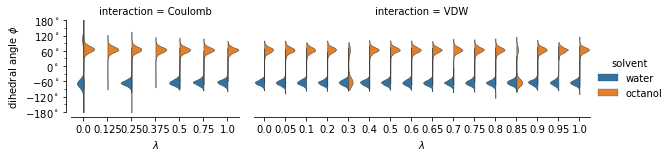

In [13]:
dihedral_analysis.plot_violins(datafiles, "SM46", "oplsaa", "dih1", figdir=FIGURES)

100%|██████████| 46/46 [00:57<00:00,  1.25s/it]


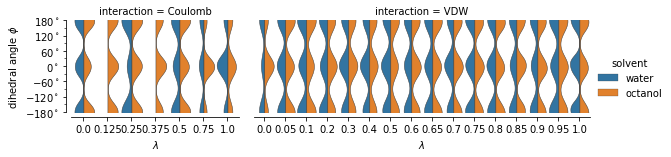

In [15]:
dihedral_analysis.plot_violins(datafiles, "SM46", "oplsaa", "dih2", figdir=FIGURES)

In [23]:
g = datafiles.groupby(["molid", "forcefield", "solvent", "interaction", "lambda", "dihedral"])

In [25]:
water_1 = g.get_group(('SM46', 'oplsaa', 'water', 'VDW', 1.0, 'dih1'))
df = dihedral_analysis.extract(water_1, step=100)

100%|██████████| 2/2 [00:04<00:00,  2.02s/it]


Both long and short together makes no difference

<AxesSubplot:xlabel='angle', ylabel='Density'>

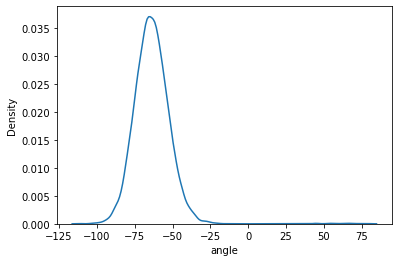

In [29]:
sns.kdeplot(data=df, x="angle")

Must add additional column to distinguish extended sims: runlength (ns), but that takes time to get from the data. Instead I am manually plotting the data.

In [37]:
water_1.filename

132    ../_dih_analysis/oplsaa-SM46-water-VDW-1000-di...
133    ../_dih_oplsaa_extended/oplsaa-SM46-water-VDW-...
Name: filename, dtype: object

In [90]:
def plot_extended(datafiles, reset_color_cycle=True, **kwargs):
    """Quick and dirty plot.
    
    Assume that datafiles.iloc[0] and datafiles.iloc[1] are the two dihedrals to plot.
    """
    dfs = []
    times = []
    for i in tqdm.tqdm(range(len(datafiles))):        
        p = datafiles.filename.iloc[i]
        df = dihedral_analysis.extract_single(p)
        # yes, I know, we read the same file twice...
        time = dihedral_analysis.read_xvg(p).time.max()/1000
        dfs.append(df)
        times.append(time)

    ax = plt.gca()
    kwargs.setdefault("linewidth", 3)
    kwargs['ax'] = ax
    if reset_color_cycle:
        ax.set_prop_cycle(None)
    for df, time in zip(dfs, times):
        df.plot.kde(label=r"0-{0:.1f} ns".format(time), **kwargs)
    ax.legend()
    ax.xaxis.set_major_locator(plt.matplotlib.ticker.MultipleLocator(60))
    ax.xaxis.set_minor_locator(plt.matplotlib.ticker.MultipleLocator(30))
    ax.xaxis.set_major_formatter(plt.matplotlib.ticker.FormatStrFormatter(r"$%g^\circ$"))
    ax.set_xlim(-180, 180)
    sns.despine(offset=10, left=True)
    ax.yaxis.set_visible(False)
    
    return ax

100%|██████████| 2/2 [00:01<00:00,  1.26it/s]


<AxesSubplot:ylabel='Density'>

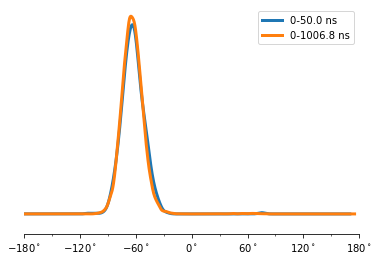

In [91]:
plot_extended(water_1, linestyle="-")

In [84]:
octanol_1 = g.get_group(('SM46', 'oplsaa', 'octanol', 'VDW', 1.0, 'dih1'))

In [85]:
octanol_1.filename

110    ../_dih_analysis/oplsaa-SM46-octanol-VDW-1000-...
111    ../_dih_oplsaa_extended/oplsaa-SM46-octanol-VD...
Name: filename, dtype: object

100%|██████████| 2/2 [00:00<00:00,  2.17it/s]


<AxesSubplot:ylabel='Density'>

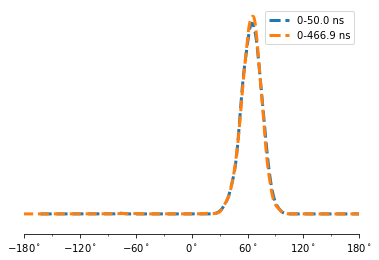

In [92]:
plot_extended(octanol_1, linestyle="--")

100%|██████████| 2/2 [00:00<00:00,  2.41it/s]


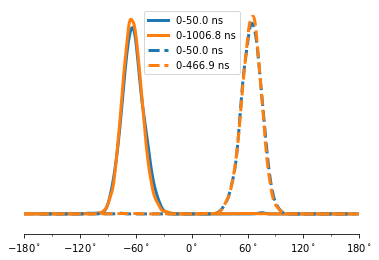

In [94]:
plot_extended(water_1, linestyle="-")
plot_extended(octanol_1, linestyle="--")
fig = plt.gcf()
fig.savefig(FIGURES / "dihedral_kde_SM46_oplsaa_dih1_VDW_1000_extended.pdf")

Comparison of the standard length simulations (blue) and the extended simulations (orange) for the SM46 octanol gas phase (VDW $\lambda=1$) dihedral dih1 shows that extending the simulations made absolutely no difference. The dihedral remains stuck and does not sample the other minimum.